In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display

import winsound
import wavio

# Data

In [106]:
audio = tf.io.read_file("tmp_audio/clnsp0.wav")
data, sr = tf.audio.decode_wav(audio)
print(data.shape)
print(sr)
data = tf.reshape(data, [len(data)])
print(data.shape)

(176320, 1)
tf.Tensor(16000, shape=(), dtype=int32)
(176320,)


In [110]:
winsound.PlaySound("tmp_audio/clnsp0.wav", winsound.SND_FILENAME)

In [107]:
S = tf.signal.stft(data, frame_length=2048,frame_step=512,pad_end=0)
print(S.shape)

S_hat = tf.signal.inverse_stft(S,frame_length=2048,frame_step=512)

S = tf.transpose(S)
print(S.shape)


(341, 1025)
(1025, 341)


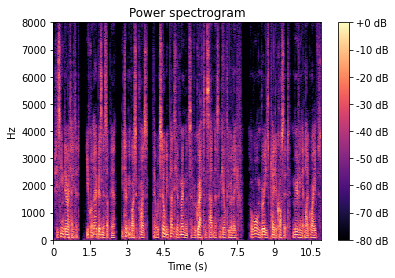

In [109]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),
                               sr=sr,
                               y_axis='linear', 
                               x_axis='s', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

# Init

In [ ]:
class CRNN(keras.layers.Layer):
    def __init__(self):
        super(CRNN, self).__init__()
        
        self.conv2d_1 = tf.keras.layers.Conv2D(filters=16 , kernel_size=(2,3), strides=(1,2))
        self.bn_1 = tf.keras.layers.BatchNormalization()
        self.conv2d_2 = tf.keras.layers.Conv2D(filters=32 , kernel_size=(2,3), strides=(1,2))
        self.bn_2 = tf.keras.layers.BatchNormalization()
        self.conv2d_3 = tf.keras.layers.Conv2D(filters=64 , kernel_size=(2,3), strides=(1,2))
        self.bn_3 = tf.keras.layers.BatchNormalization()
        self.conv2d_4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(2,3), strides=(1,2))
        self.bn_4 = tf.keras.layers.BatchNormalization()
        self.conv2d_5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(2,3), strides=(1,2))
        self.bn_5 = tf.keras.layers.BatchNormalization()

        LSTM_1 = tf.keras.layers.LSTM(units=1024)
        LSTM_2 = tf.keras.layers.LSTM(units=1024)
        

        deconv2d_1 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2,3), strides=(1,2))
        self.bnt_5 = tf.keras.layers.BatchNormalization()
        deconv2d_2 = tf.keras.layers.Conv2DTranspose(filters=64 , kernel_size=(2,3), strides=(1,2))
        self.bnt_5 = tf.keras.layers.BatchNormalization()
        deconv2d_3 = tf.keras.layers.Conv2DTranspose(filters=32 , kernel_size=(2,3), strides=(1,2))
        self.bnt_5 = tf.keras.layers.BatchNormalization()
        deconv2d_4 = tf.keras.layers.Conv2DTranspose(filters=16 , kernel_size=(2,3), strides=(1,2))
        self.bnt_5 = tf.keras.layers.BatchNormalization()
        deconv2d_5 = tf.keras.layers.Conv2DTranspose(filters=1  , kernel_size=(2,3), strides=(1,2))

    def call(self, inputs):
        x1 = self.bn_1(self.conv2d_1(inputs))
        x2 = self.bn_2(self.conv2d_2(x1))
        x3 = self.bn_3(self.conv2d_2(x2))
        x4 = self.bn_4(self.conv2d_2(x3))
        x5 = self.bn_5(self.conv2d_2(x4))